<a href="https://colab.research.google.com/github/JanuNandhini/24ADI003-ex-4-24BAD041/blob/main/GAUSSIAN_NA%C3%8FVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
iris=load_iris()
X=iris.data
y=iris.target
feature_names=iris.feature_names
target_names=iris.target_names
df=pd.DataFrame(X, columns=feature_names)
df['species']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = gnb.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [9]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [11]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print(comparison.head(10))

   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1
5       0          0
6       1          1
7       2          2
8       1          1
9       1          1


In [12]:
y_prob = gnb.predict_proba(X_test)

prob_df = pd.DataFrame(y_prob, columns=target_names)
print(prob_df.head())

          setosa    versicolor     virginica
0   5.973226e-90  9.956358e-01  4.364232e-03
1   1.000000e+00  4.961577e-14  6.549219e-21
2  7.318611e-290  4.929473e-12  1.000000e+00
3   2.818383e-94  9.775936e-01  2.240644e-02
4  1.138764e-105  8.700226e-01  1.299774e-01


In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0


In [14]:
y_pred_train = lr.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))

Training Accuracy: 0.9666666666666667
Test Accuracy: 1.0


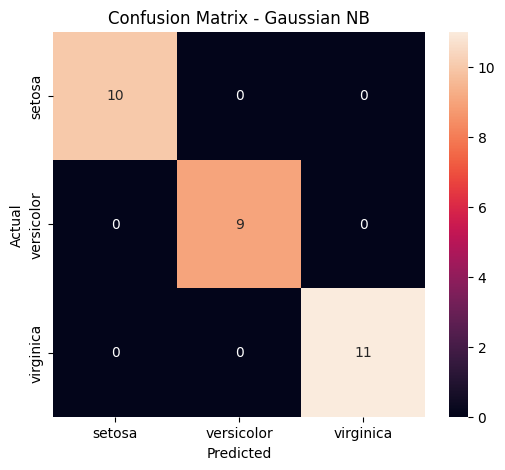

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian NB")
plt.show()

/tmp/ipython-input-3854271273.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


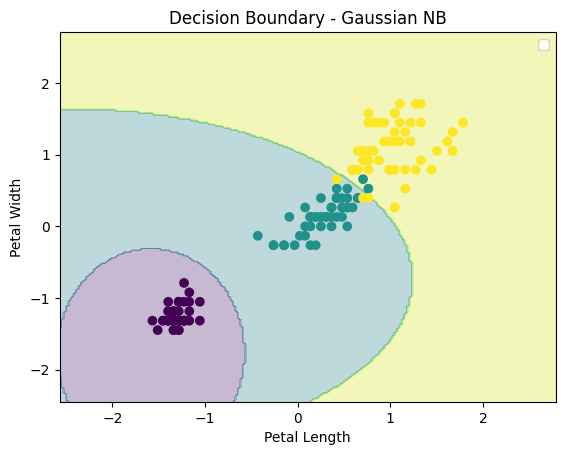

In [19]:
X2 = X_scaled[:, 2:4]
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = gnb2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Decision Boundary - Gaussian NB")
plt.show()

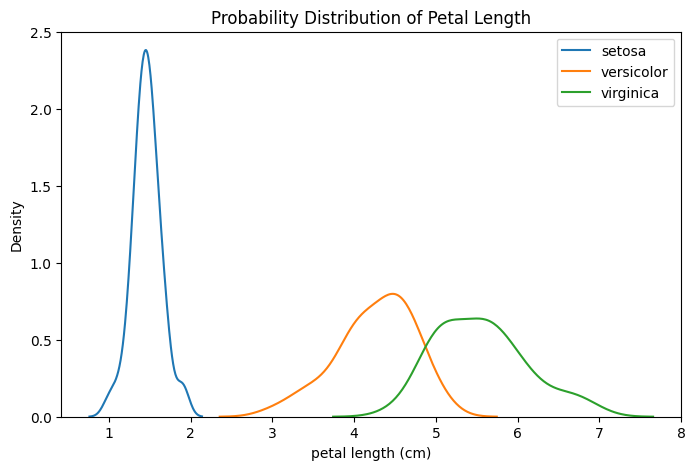

In [17]:
plt.figure(figsize=(8,5))

for i in range(3):
    sns.kdeplot(df[df['species']==i][feature_names[2]],
                label=target_names[i])

plt.title("Probability Distribution of Petal Length")
plt.legend()
plt.show()

In [18]:
df.groupby('species_name').mean().plot(kind='bar', figsize=(10,6))
plt.title("Mean Feature Comparison")
plt.show()

KeyError: 'species_name'